In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='darkgrid', palette='pastel')
sns_context = sns.set_context('paper', font_scale=1.25)
sns.set_palette('deep')
sns_context

In [110]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [111]:
f'{train.shape}, {test.shape}'

'(58645, 13), (39098, 12)'

In [112]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [113]:
train['cb_person_default_on_file'].replace({'N':0, 'Y':1}, inplace=True)
test['cb_person_default_on_file'].replace({'N':0, 'Y':1}, inplace=True)

In [114]:
train.isna().sum() # no hay nulos

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

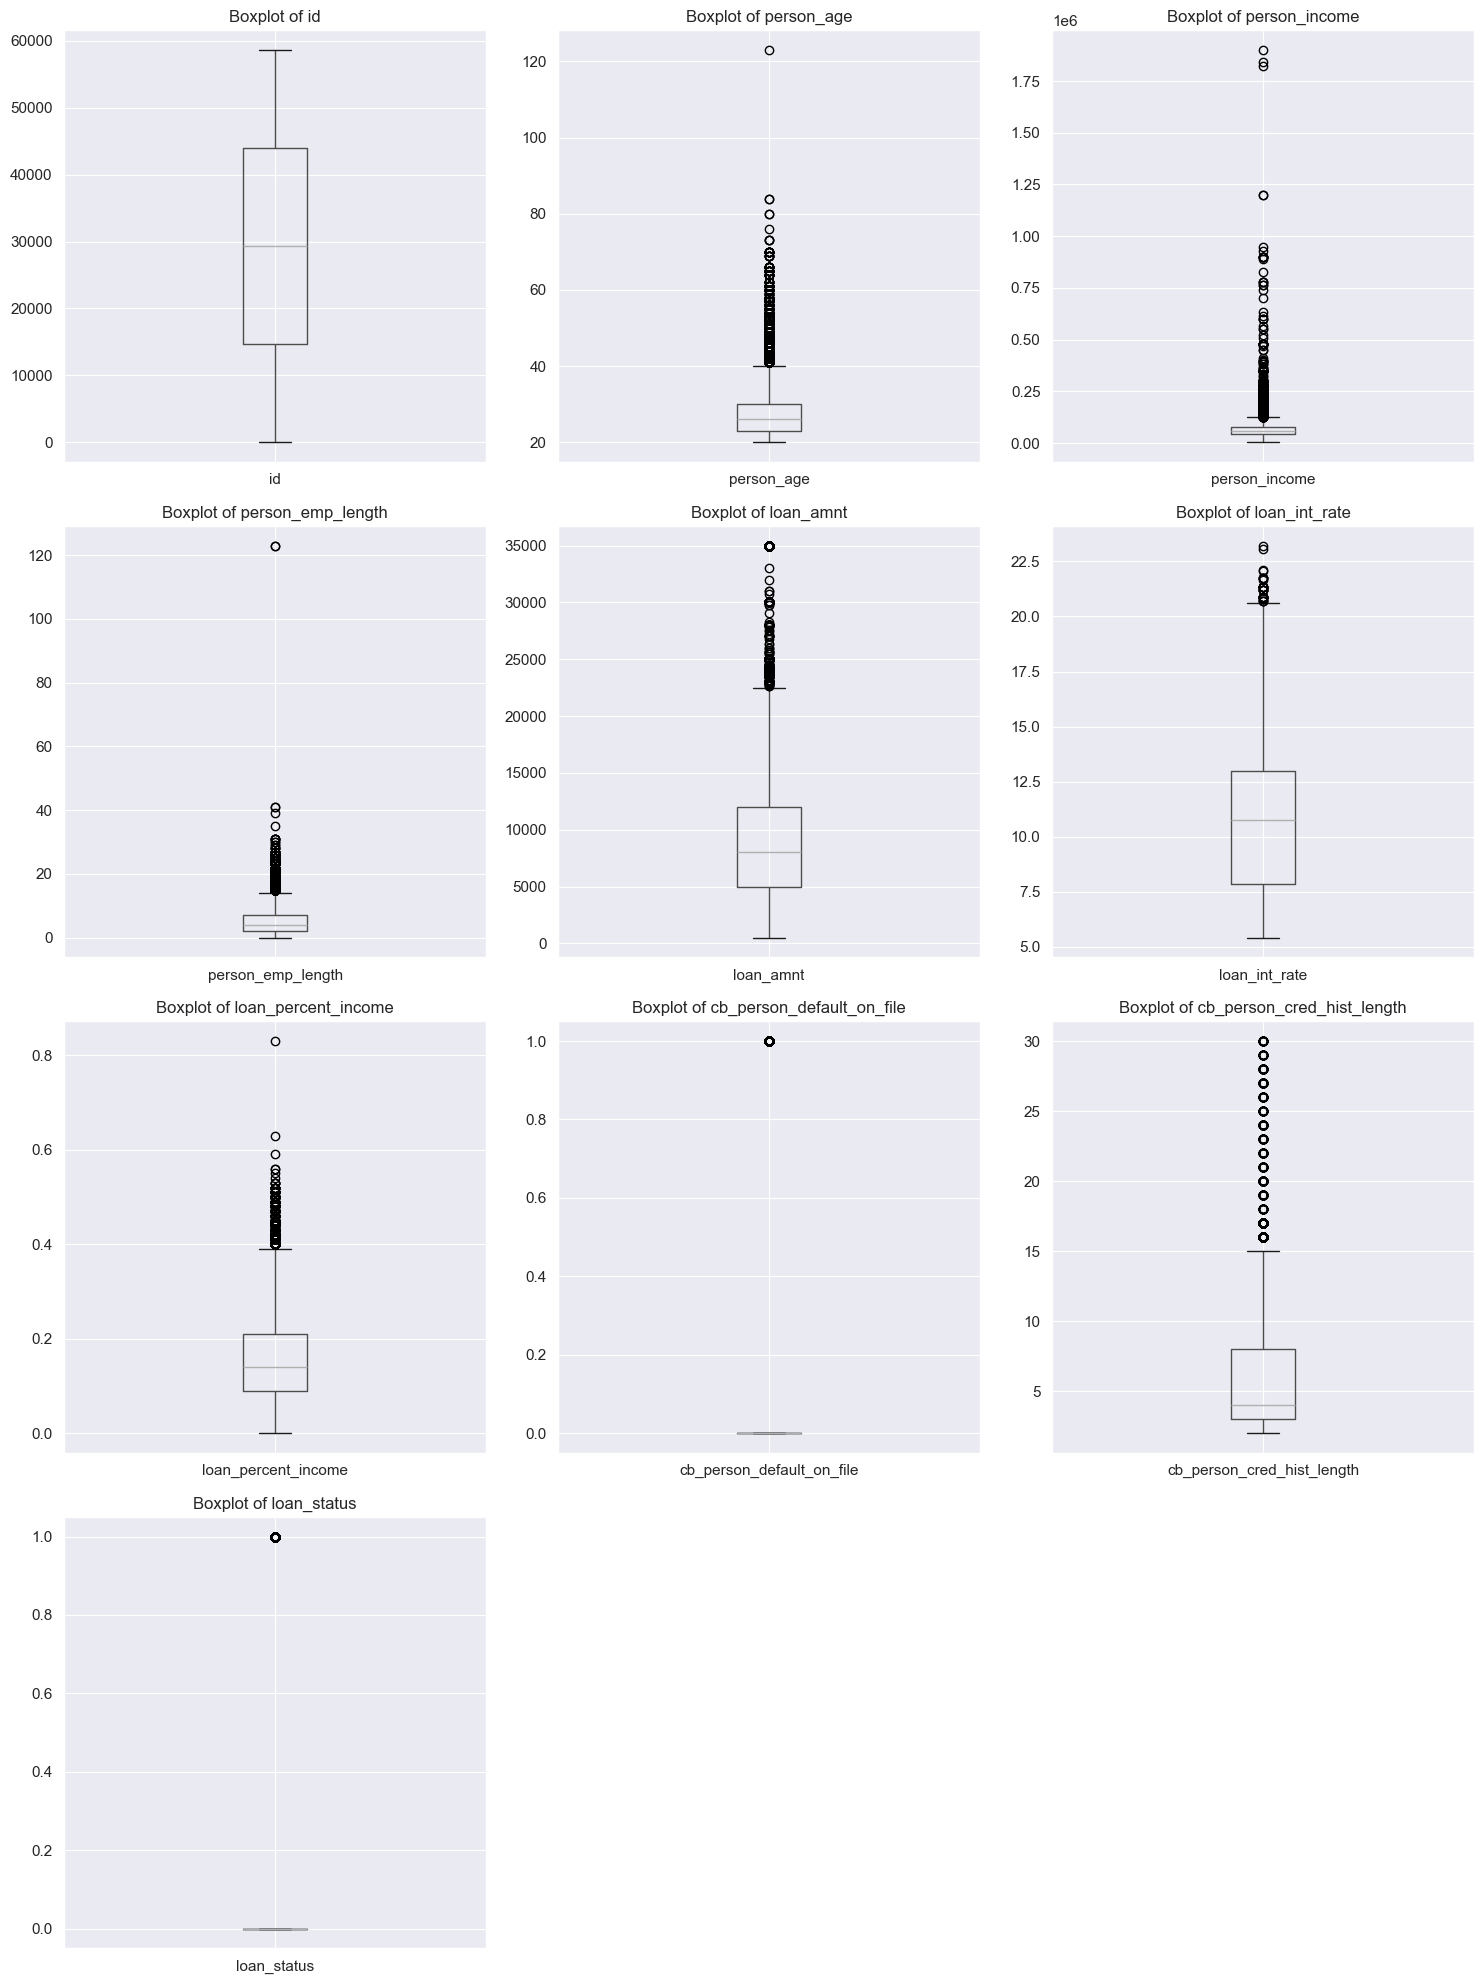

In [115]:
numerical_cols = train.select_dtypes(include=['number']).columns

# Configurar el tamaño de los subplots
num_plots = len(numerical_cols)
cols = 3  # Cantidad de subplots por fila
rows = (num_plots + cols - 1) // cols  # Calcular filas necesarias

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Aplanar para facilitar la iteración

for i, col in enumerate(numerical_cols):
    train.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Ocultar subplots vacíos si hay más espacios que gráficos
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [116]:
train = train[(train['person_income'] < 1000000) & (train['person_age'] < 100) & (train['person_emp_length'] < 100)] # Eliminamos los outliers extremos
train.reset_index(inplace=True, drop=True)

Text(0.5, 1.0, 'Distribucion de person_income por loan_status')

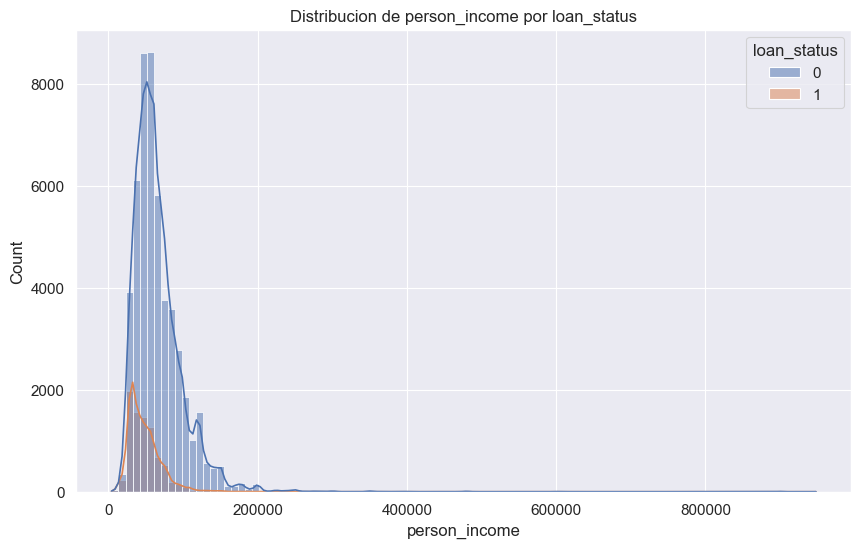

In [117]:
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='person_income', hue='loan_status', bins=100, kde=True)
plt.title('Distribucion de person_income por loan_status') # Podemos remover los casos con income > 1000000 ya que no afectaria a la distribucion y lo podemos considerar un outlier extremo

Text(0.5, 1.0, 'Distribucion de person_emp_length por loan_status')

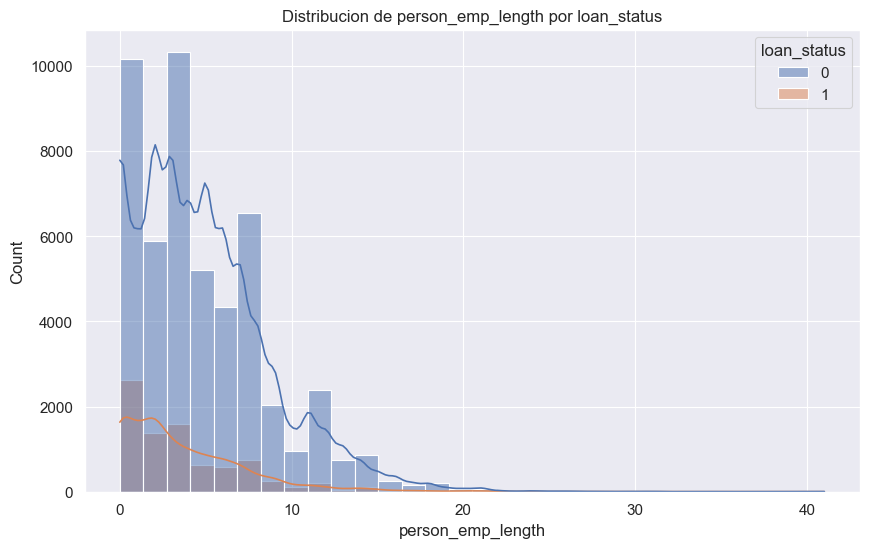

In [118]:
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='person_emp_length', hue='loan_status', bins=30, kde=True)
plt.title('Distribucion de person_emp_length por loan_status') # Tambien, hay un caso donde tiene un tiempo de trabajo de 123 anios, lo podemos remover

Text(0.5, 1.0, 'Distribucion de person_age por loan_status')

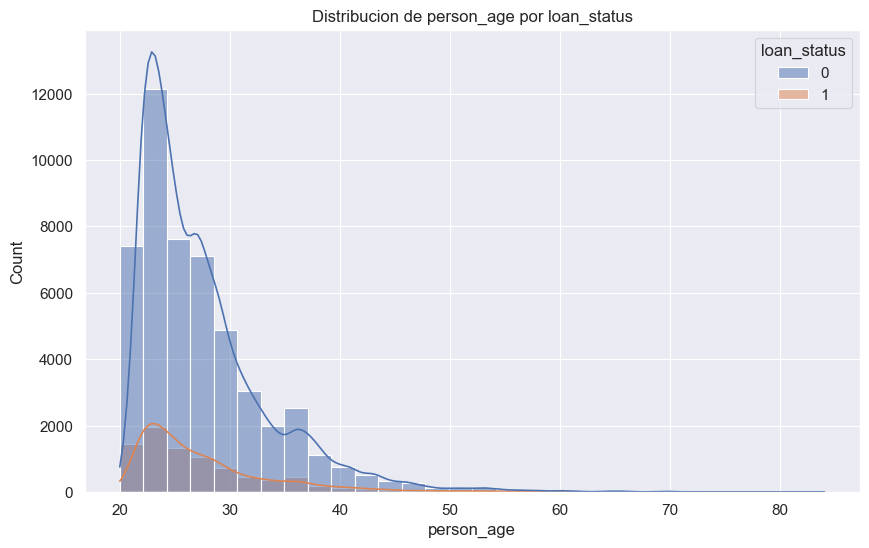

In [119]:
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='person_age', hue='loan_status', bins=30, kde=True)
plt.title('Distribucion de person_age por loan_status')

<Axes: >

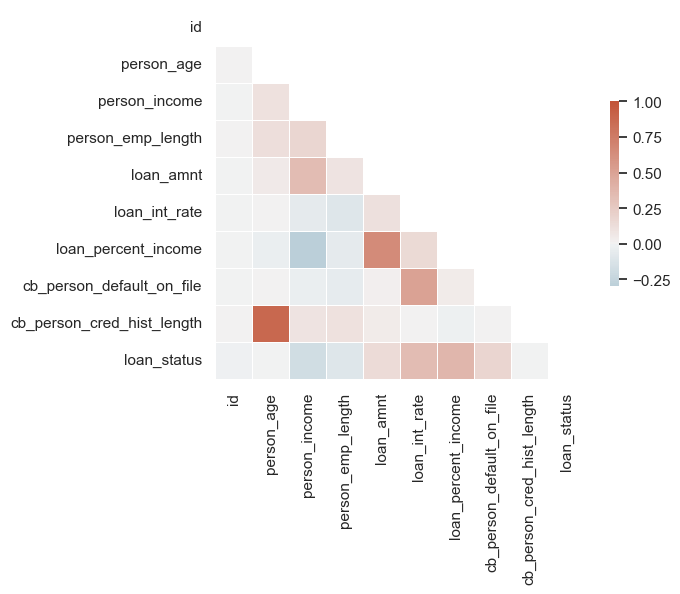

In [120]:
sns.set_theme(style='white')

df_num = train.select_dtypes(include=['number'])

corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [121]:
# def create_bivariate_plots_numerical(df, target_column):
    
#     numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
#     if target_column in numerical_cols:
#         numerical_cols.remove(target_column)
    
#     # setting up the matplotlib figure
#     n_rows = len(numerical_cols)  # One row for each numerical column
#     fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows * 4))
    
#     # flatten the axes array for easy iteration
#     #axes = axes.flatten()
    
#     # creating bivariate plots
#     for i, col in enumerate(numerical_cols):
#         # Create a histogram
#         sns.histplot(data=df, x=col, hue=target_column, ax=axes[i, 0], kde=True)
#         axes[i, 0].set_title(f'{col}')
        
#         # Create a boxplot beside the histogram
#         sns.boxplot(data=df, y=col, x=target_column, ax=axes[i, 1])
#         axes[i, 1].set_title(f'{col}')
    
#     plt.tight_layout()
#     plt.show()

# create_bivariate_plots_numerical(train, 'loan_status')

In [122]:
# def create_bivariate_plots_categorical(df, target_column):
    
#     # selecting categorical column names
#     categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
#     if target_column in categorical_cols:
#         categorical_cols.remove(target_column)

#     # setting up the matplotlib figure
#     n_rows = int(np.ceil(len(categorical_cols)/2))  # One row for each numerical column
#     fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows * 4))
    
#     # flatten the axes array for easy iteration
#     axes = axes.flatten()
    
#     for i, col in enumerate(categorical_cols):
#         # calculating the percentage of positive target variable for each category
#         percentage_df = df.groupby(col)[target_column].mean().sort_values().reset_index()
#         percentage_df[target_column] = percentage_df[target_column] * 100  # convert to percentage

#         # creating bar plots
#         sns.barplot(data=percentage_df, x=col, y=target_column, ax = axes[i], palette='viridis')
#         axes[i].set_title(f'Percentage of Loan Default by {col}')
#         axes[i].set_xticks(axes[i].get_xticks(), axes[i].get_xticklabels(), rotation=45, ha='right')
#         axes[i].set_ylabel(f'Loan Default %')
        
#     plt.tight_layout()
#     plt.show()

# create_bivariate_plots_categorical(train, 'loan_status')

## Feature Engineering

In [123]:
def feature_creation(df):
    df['income_loan_ratio'] = df['person_income'] / df['loan_amnt']
    df['age_category'] = pd.cut(df['person_age'], bins=[19, 30, 55, 100], labels=['young-adult','adult','senior'])
    df['emp_length_group'] = pd.cut(df['person_emp_length'], bins=[-1,5,10,15,100], labels=['junior', 'semi-senior', 'senior', 'expert'])
    return df

In [124]:
train = feature_creation(train)

In [125]:
from category_encoders import TargetEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pathlib
import joblib 

def trans_factores(df,vars_cat,var_clase):
    ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
    frecuency_transformer = CountFrequencyEncoder(encoding_method='frequency')
    target_encoder = TargetEncoder()

    preprocess = ColumnTransformer(
    transformers=[
    ('ordinal_encoder', ordinal_encoder, vars_cat),
    ('frecuency_transformer', frecuency_transformer, vars_cat),
    ('target_encoder', target_encoder, vars_cat)
    ], remainder='passthrough') 

    train_features = preprocess.fit_transform(df[vars_cat],df[var_clase])

    pathlib.Path(f"preprocessing").mkdir(parents=True, exist_ok=True)
    _=joblib.dump(preprocess, 'preprocessing/transformer.joblib')
    
    #Renombramos variables codificadas
    vars_cat_cols=[s + '_ordinal' for s in vars_cat]
    vars_cat_cols=vars_cat_cols+[s + '_freq' for s in vars_cat]
    vars_cat_cols=vars_cat_cols+[s + '_target' for s in vars_cat]
    df2=df.copy()
    df2.drop(columns=vars_cat,axis=1,inplace=True)
    df2=pd.concat([df2,pd.DataFrame(train_features,columns=vars_cat_cols)],axis=1)
    return(df2)

In [126]:
vars_cat = ['person_home_ownership', 'loan_intent', 'loan_grade', 'age_category', 'emp_length_group']
var_clase='loan_status'
train = trans_factores(train,vars_cat,var_clase)

In [127]:
train

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,...,person_home_ownership_freq,loan_intent_freq,loan_grade_freq,age_category_freq,emp_length_group_freq,person_home_ownership_target,loan_intent_target,loan_grade_target,age_category_target,emp_length_group_target
0,0,37,35000,0.0,6000,11.49,0.17,0,14,0,...,0.521718,0.209254,0.347869,0.217627,0.645190,0.222575,0.107742,0.102314,0.141917,0.164781
1,1,22,56000,6.0,4000,13.35,0.07,0,2,0,...,0.053516,0.186452,0.188192,0.778945,0.265208,0.013703,0.178176,0.135387,0.142354,0.107196
2,2,29,28800,8.0,6000,8.90,0.21,0,10,0,...,0.053516,0.170780,0.357812,0.778945,0.265208,0.013703,0.132814,0.049187,0.142354,0.107196
3,3,30,70000,14.0,12000,11.11,0.17,0,5,0,...,0.521718,0.170694,0.347869,0.778945,0.074185,0.222575,0.092816,0.102314,0.142354,0.080000
4,4,22,60000,2.0,6000,6.92,0.10,0,3,0,...,0.521718,0.186452,0.357812,0.778945,0.645190,0.222575,0.178176,0.049187,0.142354,0.164781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58632,58640,34,120000,5.0,25000,15.95,0.21,1,10,0,...,0.423248,0.209254,0.085816,0.217627,0.645190,0.059715,0.107742,0.593601,0.141917,0.164781
58633,58641,28,28800,0.0,10000,12.73,0.35,0,8,1,...,0.521718,0.186452,0.188192,0.778945,0.645190,0.222575,0.178176,0.135387,0.142354,0.164781
58634,58642,23,44000,7.0,6800,16.00,0.15,0,2,1,...,0.521718,0.209254,0.085816,0.778945,0.265208,0.222575,0.107742,0.593601,0.142354,0.107196
58635,58643,22,30000,2.0,5000,8.90,0.17,0,3,0,...,0.521718,0.209254,0.357812,0.778945,0.645190,0.222575,0.107742,0.049187,0.142354,0.164781


In [128]:
feature_creation(test)
preprocess = joblib.load('preprocessing/transformer.joblib')
test_features = preprocess.transform(test)

vars_cat_cols=[s + '_ordinal' for s in vars_cat]
vars_cat_cols=vars_cat_cols+[s + '_freq' for s in vars_cat]
vars_cat_cols=vars_cat_cols+[s + '_target' for s in vars_cat]
test_mod=pd.concat([test,pd.DataFrame(test_features,columns=vars_cat_cols)],axis=1)
test_mod.drop(columns=vars_cat,axis=1,inplace=True)
test_mod

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_loan_ratio,...,person_home_ownership_freq,loan_intent_freq,loan_grade_freq,age_category_freq,emp_length_group_freq,person_home_ownership_target,loan_intent_target,loan_grade_target,age_category_target,emp_length_group_target
0,58645,23,69000,3.0,25000,15.76,0.36,0,2,2.760000,...,0.521718,0.107100,0.002541,0.778945,0.645190,0.222575,0.173726,0.610737,0.142354,0.164781
1,58646,26,96000,6.0,10000,12.68,0.10,1,4,9.600000,...,0.423248,0.170780,0.188192,0.778945,0.265208,0.059715,0.132814,0.135387,0.142354,0.107196
2,58647,26,30000,5.0,4000,17.19,0.13,1,2,7.500000,...,0.521718,0.170694,0.017208,0.778945,0.645190,0.222575,0.092816,0.625372,0.142354,0.164781
3,58648,33,50000,4.0,7000,8.90,0.14,0,7,7.142857,...,0.521718,0.155721,0.357812,0.217627,0.645190,0.222575,0.189355,0.049187,0.141917,0.164781
4,58649,26,102000,8.0,15000,16.32,0.15,1,4,6.800000,...,0.423248,0.107100,0.085816,0.778945,0.265208,0.059715,0.173726,0.593601,0.142354,0.107196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,2.0,3000,10.37,0.10,0,4,10.400000,...,0.423248,0.155721,0.347869,0.778945,0.645190,0.059715,0.189355,0.102314,0.142354,0.164781
39094,97739,22,48000,6.0,7000,6.03,0.15,0,3,6.857143,...,0.423248,0.209254,0.357812,0.778945,0.265208,0.059715,0.107742,0.049187,0.142354,0.107196
39095,97740,51,60000,0.0,15000,7.51,0.25,0,25,4.000000,...,0.423248,0.170780,0.357812,0.217627,0.645190,0.059715,0.132814,0.049187,0.141917,0.164781
39096,97741,22,36000,4.0,14000,15.62,0.39,1,4,2.571429,...,0.423248,0.170780,0.085816,0.778945,0.645190,0.059715,0.132814,0.593601,0.142354,0.164781


In [129]:
train.to_csv('./data/train_mod.csv',index=False)
test_mod.to_csv('./data/test_mod.csv',index=False)